In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [2]:
def buildVDMmatFast(xobs,yobs, xRBF, yRBF, sigma=1):
# Bulid the VM matrix for n data fitting points
# using k RBF points
# Assume k<n
  Xobs = torch.cat((xobs.unsqueeze(1),yobs.unsqueeze(1)), dim=1)
  XRBF = torch.cat((xRBF.unsqueeze(1),yRBF.unsqueeze(1)), dim=1)
  
  Phi = torch.cdist(Xobs, XRBF)
  Phi = torch.exp(-Phi/sigma)
  return Phi

def interpolate_new_points(x, y, xI, yI, a, sigma=1):
  X  = torch.cat((x.unsqueeze(1),y.unsqueeze(1)), dim=1)
  XI = torch.cat((xI.unsqueeze(1),yI.unsqueeze(1)), dim=1)
  Phi = torch.cdist(XI, X)
  Phi = torch.exp(-Phi/sigma)

  cnew = Phi@a

  return cnew


In [5]:
# The data

x = torch.tensor([ 1.0164, -1.5567,  0.9979, -2.3360, -2.1001, -2.6925, -0.5824, -1.7350,
        -0.5437,  2.1748,  1.1212,  2.3274, -2.6289,  2.9970, -2.2952, -0.8430,
         1.2064, -2.1528, -0.2528, -0.8610,  0.3767, -0.5013,  2.8018,  0.3056,
        -1.5280,  2.0677,  0.1646, -1.5907,  1.4108,  1.1018, -2.8402,  0.1735,
        -2.5122,  1.9029,  1.8905, -0.8753,  2.4716, -1.7837,  2.5181, -1.8588,
        -1.9039, -2.8291,  0.0920, -2.0515,  2.9464, -1.0748, -2.1228,  2.4209,
        -2.1144, -2.7789, -1.0690, -2.0386, -0.4589,  0.6208, -1.4958,  1.8012,
         0.9639, -2.8076, -2.4836,  2.6666,  2.0992,  1.9441, -0.2381, -1.6271,
         1.6539,  2.7473,  0.2165,  0.1379, -1.4801, -2.3848, -2.0503,  1.5106,
         0.1922, -2.7162,  2.1601,  2.5862, -0.1544, -2.0798, -1.7803, -2.1966,
        -2.7590,  2.3955, -1.4673, -0.5848,  2.2922,  0.5504, -1.1960,  0.0567,
        -2.8829, -2.5314,  0.2770, -2.3216, -0.8247,  1.4982,  2.8790,  1.1065,
         0.5869, -2.5118,  2.2570, -2.9656,  1.8788,  1.7264, -2.0879, -0.5473,
        -1.1254,  2.8694,  0.4330,  1.6729,  1.7067, -0.1384,  2.2281, -0.2312,
         2.5872, -1.8465, -1.0417,  0.1483,  2.7419, -2.3204, -1.6635,  2.2517,
        -1.6411,  0.0785,  1.5391,  1.3196,  2.8079,  0.5907, -2.9382, -1.9845,
         2.7133, -0.2887, -1.4928, -2.3228])

y = torch.tensor([ 7.1906e-01, -1.9724e+00,  2.9458e+00,  6.6973e-01,  6.6584e-01,
         1.5708e+00, -2.1038e+00, -9.0205e-01, -8.5502e-01, -2.9866e+00,
         5.9745e-01, -2.8424e+00,  7.3405e-02,  6.6691e-01,  5.3862e-01,
         6.0456e-01,  2.4519e+00, -2.7541e+00, -2.6965e+00,  1.0955e+00,
         2.5447e+00, -1.3439e+00, -2.2677e-01, -2.5859e+00, -1.4390e+00,
         3.2034e-01, -1.4931e+00,  1.6408e+00,  2.3280e+00, -5.2715e-02,
        -3.4354e-01,  1.4770e+00,  2.7845e+00,  7.4315e-01,  1.9464e+00,
        -2.8526e+00, -1.2892e+00,  1.0620e+00,  1.8386e+00, -1.1207e+00,
        -2.0332e-01, -2.6279e+00, -2.7492e+00, -1.2973e+00, -1.2249e+00,
         3.6560e-01,  2.3160e+00,  5.9881e-01, -3.7190e-01,  6.4841e-01,
        -7.2399e-01, -1.3681e+00,  9.3760e-01, -2.2177e+00, -1.4781e+00,
         2.0149e+00, -8.1258e-01,  5.5215e-01,  1.4925e+00,  2.8050e+00,
         1.6841e+00, -1.7760e+00, -1.6506e+00,  2.6669e+00, -1.1973e+00,
         1.8686e+00, -3.9026e-01, -2.3851e-01,  2.2856e+00,  1.4442e+00,
         9.5466e-02, -3.9330e-01,  1.9933e+00, -6.9086e-01,  1.7497e+00,
         2.6401e+00,  1.2393e+00, -2.5103e+00, -2.9482e+00,  2.5018e+00,
        -7.7683e-01,  2.8816e+00,  2.9532e+00, -1.6098e+00,  1.5598e+00,
        -1.9628e+00, -2.2882e+00,  7.1324e-01, -2.7490e+00, -8.5254e-01,
         1.1458e+00, -4.2485e-01, -6.0252e-01, -1.6078e+00, -9.1127e-01,
        -2.5661e-01,  1.2939e+00,  2.4223e+00,  2.1334e+00, -1.4210e+00,
         2.9506e+00, -1.1815e+00,  1.8976e+00,  2.8882e+00,  6.7138e-01,
        -2.8061e+00, -2.4788e+00, -4.6466e-01, -1.6395e+00, -1.4714e+00,
         1.3265e+00,  8.6244e-01,  2.1711e+00,  2.5463e+00, -2.8034e+00,
        -7.2505e-01,  2.0055e+00,  6.7298e-01,  2.1043e+00, -3.9842e-01,
        -2.9374e+00, -7.4173e-01, -7.7792e-01,  2.3594e+00, -2.0003e-01,
         1.8056e+00,  2.1682e-03,  2.1032e+00, -2.7117e+00,  1.5913e+00,
        -1.0087e+00, -2.4704e+00])

c = torch.tensor([2.2510e+00, -1.6319e-02,  8.5908e-02, -3.5505e-01, -8.0700e-01,
         9.6378e-02, -1.8999e+00, -9.0566e-02,  3.3870e+00, -1.9707e-01,
         2.4127e+00,  1.1720e-02, -6.9410e-02, -1.3479e-02, -4.0679e-01,
        -9.0061e-01,  5.4170e-01, -3.3169e-02, -5.8267e-01,  1.7031e+00,
         1.4474e+00, -7.9870e-01,  5.0028e-02, -1.2375e+00,  2.2721e-01,
         1.1051e+00, -6.3247e+00,  3.5131e-01,  3.4975e-01,  3.3612e+00,
        -9.9763e-02,  7.7860e+00, -3.2228e-02,  9.5740e-01,  1.6625e-01,
        -1.5647e-02,  2.1947e-02, -7.4128e-01,  1.4194e-02, -1.4548e-01,
        -1.4625e+00, -1.2307e-01, -5.7924e-01,  5.5655e-04,  6.2135e-02,
        -2.6197e+00, -6.0777e-02,  3.0102e-01, -7.4618e-01, -3.2630e-01,
         1.3674e+00, -2.1103e-02,  2.4588e+00, -2.5235e+00,  2.0938e-01,
         1.9999e-01,  7.5651e-01, -7.3619e-02, -7.8908e-02,  1.5973e-02,
         1.1566e-01,  3.2020e-02, -4.5960e+00,  2.3793e-01,  3.0008e-01,
         3.3379e-02,  7.3679e-01,  8.4799e-01,  2.1457e-01, -3.0819e-02,
        -1.2331e+00,  2.6165e+00,  5.6186e+00, -8.9886e-02,  1.2100e-01,
        -4.4892e-02,  6.2528e+00,  2.1614e-01, -7.1035e-02,  1.8281e-02,
        -9.4198e-02, -7.4897e-03,  1.3070e-01, -2.1090e+00,  1.4139e-01,
        -4.2756e+00, -6.8905e-02,  1.3231e+00, -1.9374e-02,  1.0306e-02,
         4.8847e+00, -4.2441e-01,  2.4475e+00, -6.4999e-01,  5.4568e-02,
         3.0596e+00,  4.7950e+00, -5.0725e-02,  5.1931e-03,  3.6266e-02,
        -2.8851e-03,  3.4967e-01, -8.8680e-02,  2.2220e-01, -1.9836e+00,
         3.3058e-02, -1.6406e+00,  2.1470e+00, -4.8736e-02, -4.7334e+00,
         7.4121e-02,  2.1776e+00,  2.1170e-02, -1.0085e-02, -2.4097e-01,
         4.3178e-01, -1.4763e-01, -3.3827e-01,  2.9111e-01,  6.7046e-01,
        -1.3198e-01,  9.2587e-01,  1.6727e+00,  3.0484e-01,  2.2697e-01,
         5.1043e+00, -6.3837e-02,  1.6617e-02, -8.6411e-02,  7.4177e+00,
         4.0958e-01,  4.8611e-02])

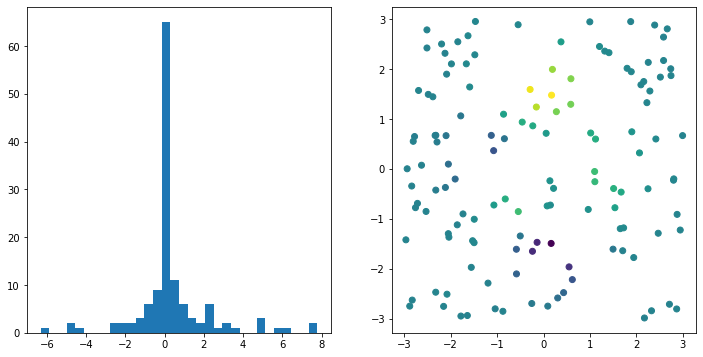

In [26]:
# Just LATFM (look at the F** Data)
plt.figure(1, figsize=[12,6])
plt.subplot(1,2,1)
plt.hist(c, 32)
plt.subplot(1,2,2)
plt.scatter(x, y, c=c)

In [7]:
# Dfine RBF points
xRBF = torch.tensor([-2, 0, 2.5, 0, -2.5, 2.5, -1, 1.5, -1, 1, -3,0])
yRBF = torch.tensor([2, 1.5, 2, -2, 0, -0.5, 0.5, -1, -1, 0, -3, 3])


In [11]:
# see how the error is decreasing as we add points
history = torch.zeros(80)
for j in range(80):
    xRBFnew = torch.rand(1)*6 - 3
    yRBFnew = torch.rand(1)*6 - 3
    xRBF = torch.cat((xRBF,xRBFnew ))
    yRBF = torch.cat((yRBF,yRBFnew ))

    Phi = buildVDMmatFast(x,y, xRBF, yRBF, sigma=1)
    I   = torch.eye(Phi.shape[1],Phi.shape[1])
    a = torch.linalg.solve(Phi.t()@Phi + 1e-3*I, Phi.t()@c)


    # checking residual
    Cest = interpolate_new_points(xRBF, yRBF, x, y, a, sigma=1)

    residual = (Cest - c).abs()
    print('number of points = %d  residual = %3.2e'%(xRBF.numel(), residual.mean()))
    history[j] = residual.mean()


number of points = 93  residual = 1.73e-01
number of points = 94  residual = 1.62e-01
number of points = 95  residual = 1.62e-01
number of points = 96  residual = 1.62e-01
number of points = 97  residual = 1.62e-01
number of points = 98  residual = 1.62e-01
number of points = 99  residual = 1.62e-01
number of points = 100  residual = 1.55e-01
number of points = 101  residual = 1.55e-01
number of points = 102  residual = 1.55e-01
number of points = 103  residual = 1.55e-01
number of points = 104  residual = 1.54e-01
number of points = 105  residual = 1.54e-01
number of points = 106  residual = 1.54e-01
number of points = 107  residual = 1.54e-01
number of points = 108  residual = 1.54e-01
number of points = 109  residual = 1.54e-01
number of points = 110  residual = 1.54e-01
number of points = 111  residual = 1.51e-01
number of points = 112  residual = 1.50e-01
number of points = 113  residual = 1.50e-01
number of points = 114  residual = 1.06e-01
number of points = 115  residual = 1.04

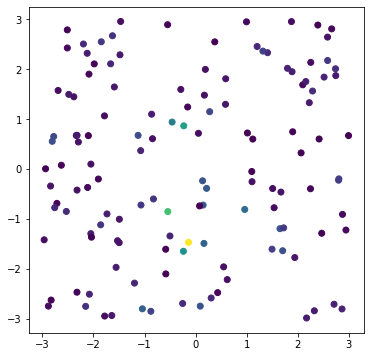

In [27]:
# Estimate the residual
plt.figure(2, figsize=[6,6])
plt.scatter(x, y, c=residual)


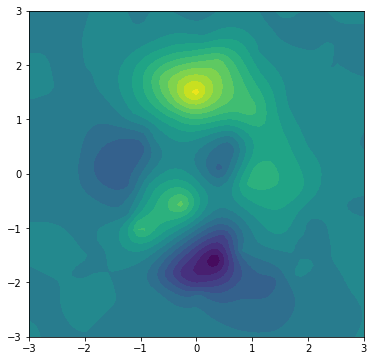

In [23]:
# View results on a fine mesh
xI = torch.linspace(-3,3,65)
yI = torch.linspace(-3,3,65)
XI, YI = torch.meshgrid(xI, yI)

XI = XI.flatten()
YI = YI.flatten()
CI = interpolate_new_points(xRBF, yRBF, XI, YI, a, sigma=1)

plt.figure(1, figsize=[6,6])
plt.contourf(XI.reshape(65,65), YI.reshape(65,65), CI.reshape(65,65), 20 )


Homework


In this homework we are going to try and understand the results of the interpolation and give some uncertainty to the results.

1. Similar to what we have done, use randomely generated 100 RBF points to generate the map CI on a uniform mesh as we have above and plot it.
Repeat the experiment 16 times. You should be getting 16 maps, each slightly different.
Use the plt.subplot to plot all 16 maps.

2. We can evaluate the uncertainty of our prediction using those maps.  
   a. Average all maps  and present an image of the average quantity  in each pixel.

   b. Compute the standard deviation of the map for each pixel

   (Hint, if you store all the maps in a 16x65x65 array then you can use the torch commands torch.mean() and torch.std() to evaluate both mean and standard deviation.

3. Plot the maps of the mean and standard deviation.   
